<a href="https://colab.research.google.com/github/YunMori/YunMori/blob/main/LSTM%EC%9D%84_%EC%9D%B4%EC%9A%A9%ED%95%9C_%EC%B9%B4%EC%B9%B4%EC%98%A4_%EC%A3%BC%EA%B0%80%EC%98%88%EC%B8%A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential

from keras.layers import LSTM, Dropout, Dense, Activation
# from keras.callbacks import TensorBoard, ModelCheckpoint, ReduceLROnPlateau
import datetime

# Load Data

In [12]:
import yfinance as yf
df = yf.download('035720.KS','2018-06-14','2023-06-13')
df.to_csv('카카오.csv')

[*********************100%***********************]  1 of 1 completed


In [13]:
data = pd.read_csv('카카오.csv')
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-06-14,22967.664062,22967.664062,22564.722656,22564.722656,22472.408203,1240929
1,2018-06-15,22564.722656,22564.722656,21960.310547,22061.044922,21970.791016,1669870
2,2018-06-18,21960.310547,22161.781250,21355.898438,21658.103516,21569.498047,2014734
3,2018-06-19,21557.369141,22262.515625,21255.162109,21456.632812,21368.853516,1245193
4,2018-06-20,21355.898438,21960.310547,21355.898438,21758.839844,21669.820312,1440849


# Compute Mid Price

In [14]:
high_prices = data['High'].values
low_prices = data['Low'].values
mid_prices = (high_prices + low_prices) / 2

# Create Windows

In [15]:
seq_len = 50
sequence_length = seq_len + 1

result = []
for index in range(len(mid_prices) - sequence_length):
    result.append(mid_prices[index: index + sequence_length])

# Normalize Data

In [16]:
normalized_data = []
for window in result:
    normalized_window = [((float(p) / float(window[0])) - 1) for p in window]
    normalized_data.append(normalized_window)

result = np.array(normalized_data)

# split train and test data
row = int(round(result.shape[0] * 0.9))
train = result[:row, :]
np.random.shuffle(train)

x_train = train[:, :-1]
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
y_train = train[:, -1]

x_test = result[row:, :-1]
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
y_test = result[row:, -1]

x_train.shape, x_test.shape

((1061, 50, 1), (118, 50, 1))

# Build a Model

In [17]:
model = Sequential()

model.add(LSTM(50, return_sequences=True, input_shape=(50, 1)))

model.add(LSTM(64, return_sequences=False))

model.add(Dense(1, activation='linear'))

model.compile(loss='mse', optimizer='rmsprop')

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 50, 50)            10400     
                                                                 
 lstm_3 (LSTM)               (None, 64)                29440     
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 39,905
Trainable params: 39,905
Non-trainable params: 0
_________________________________________________________________


# Training

In [18]:
model.fit(x_train, y_train,
    validation_data=(x_test, y_test),
    batch_size=10,
    epochs=20)

Epoch 1/20
107/107 [==============================] - 5s 15ms/step - loss: 0.0062 - val_loss: 0.0018
Epoch 2/20
107/107 [==============================] - 1s 8ms/step - loss: 0.0029 - val_loss: 0.0015
Epoch 3/20
107/107 [==============================] - 1s 8ms/step - loss: 0.0023 - val_loss: 0.0012
Epoch 4/20
107/107 [==============================] - 1s 8ms/step - loss: 0.0021 - val_loss: 0.0026
Epoch 5/20
107/107 [==============================] - 1s 10ms/step - loss: 0.0019 - val_loss: 9.3812e-04
Epoch 6/20
107/107 [==============================] - 1s 11ms/step - loss: 0.0017 - val_loss: 9.0284e-04
Epoch 7/20
107/107 [==============================] - 1s 9ms/step - loss: 0.0016 - val_loss: 7.9236e-04
Epoch 8/20
107/107 [==============================] - 1s 8ms/step - loss: 0.0015 - val_loss: 0.0020
Epoch 9/20
107/107 [==============================] - 1s 8ms/step - loss: 0.0014 - val_loss: 0.0015
Epoch 10/20
107/107 [==============================] - 1s 8ms/step - loss: 0.0013 - v

# Prediction

4/4 [==============================] - 2s 6ms/step


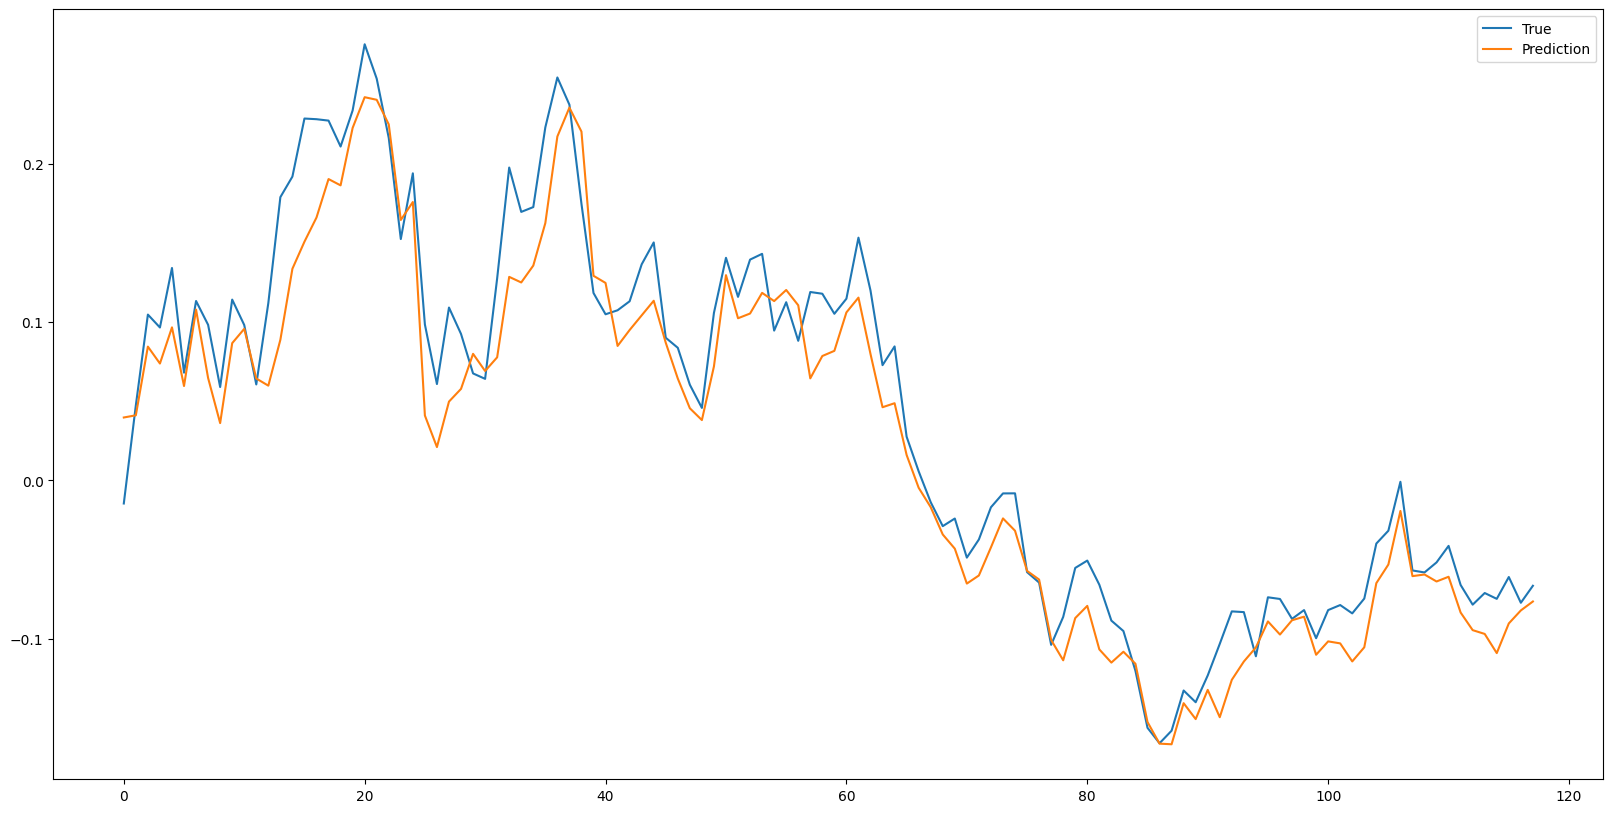

In [19]:
pred = model.predict(x_test)

fig = plt.figure(facecolor='white', figsize=(20, 10))
ax = fig.add_subplot(111)
ax.plot(y_test, label='True')
ax.plot(pred, label='Prediction')
ax.legend()
plt.show()